## sklearn.cluster.dbscan

* sklearn.cluster.dbscan(_X_, _eps=0.5_, _*_, _min_samples=5_, _metric='minkowski'_, _metric_params=None_, _algorithm='auto'_, _leaf_size=30_, _p=2_, _sample_weight=None_, _n_jobs=None_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/8c9c1f27b/sklearn/cluster/_dbscan.py#L25)[¶](https://scikit-learn.org/stable/modules/generated/dbscan-function.html#sklearn.cluster.dbscan "Permalink to this definition")

** Perform DBSCAN clustering from vector array or distance matrix.

Read more in the  [User Guide](https://scikit-learn.org/stable/modules/clustering.html#dbscan).

In [11]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = DBSCAN(min_samples=6)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

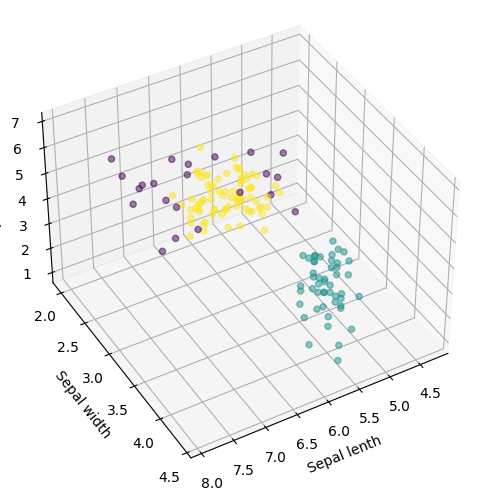

In [32]:
from mpl_toolkits.mplot3d import Axes3D

# scatter plot

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.view_init(40, 60)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

In [16]:
ct = pd.crosstab(data['labels'],r['predict'])
print(ct)

predict  -1   0   1
labels             
0         1  49   0
1         6   0  44
2        15   0  35
